## Validation of scAstral pretrained model on Triple Negative BRCA cell lines
#### load data and models and library import 

In [1]:
import os
import sys
import dill
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, pearsonr

sys.path.extend([f"{os.getcwd()}/.."]) 
valid_set = [
    'SUM149PT',
    'HCC38',
    'HCC70',
    'CAL851',
    'SUM229PE',
    'HDQP1',
    'BT20',
    'HCC1937',
    'SUM185PE',
    'HCC1143',
    'BT549',
    'SUM159PT',
    'CAL51',
    'SUM1315MO2',
    'HCC1187',
    'MDAMB436',

]

signature = pd.read_csv('../data/signature_374.csv')
signature = list(signature['ensembl_gene_id'])

response = pd.read_csv('../data/validation_set/afatinib.csv')
response['cl'] = [p.replace('-', '') for p in response['Cell line']]
response['log(IC50)'] = np.log2(response['IC50'])
response = response.loc[:, ['cl', 'log(IC50)']]
response['score'] = np.nan

path = '../data/validation_set/preprocessed'

model = dill.load(open("../models/scastral.pkl", 'rb'))


/home/tigem/r.arnese/.local/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator SVC from version 1.3.1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
for cell_line in valid_set:
    df = pd.read_csv(f'{path}/{cell_line}.csv', index_col=0)
    df = df[signature].to_numpy()
    response.loc[response['cl'] == cell_line, 'score'] = np.mean(model.predict(df)) 


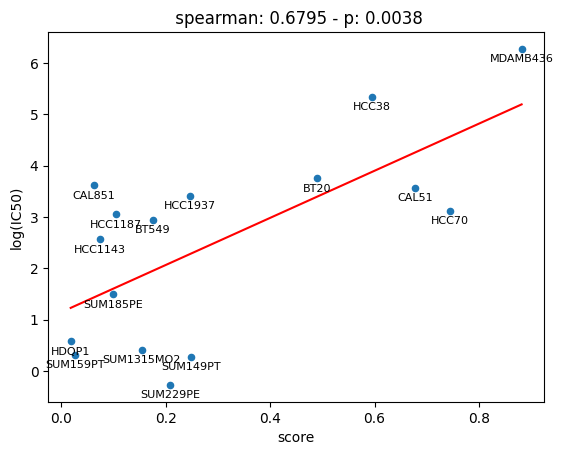

In [3]:
response = response.dropna()
test = pearsonr(response['log(IC50)'], response['score'])
response.plot.scatter(y='log(IC50)', x='score', title=f" spearman: {test.statistic:.4f} - p: {test.pvalue:.4f}")
rss = linregress(response['score'], response['log(IC50)'])
x = np.array([response['score'].min(), response['score'].max()])
plt.plot(x, rss.intercept + rss.slope * x, 'r')
for idx, row in response.iterrows():
    plt.text(row['score'], row['log(IC50)'] - .1, row['cl'], va='top', ha='center', fontsize=8)
plt.show()